In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
ls

 AutoInsurance.csv
 AutoInsurance_PolynomialRegression.py
 AutoInsurance.py
 AutoInsurance_SimpleLinearRegression.py
 AutoInsurance_SVR.py
 AutoInsurance.xls
 AutoInsurSweden_DataSet1.pdf
 Auto.py
 Linear_Regression_from_scratch.ipynb
'Simple Linear Regression on AutoInsurance From Scratch.ipynb'
'Simple Linear Regression on AutoInsurance From Scratch.py'
'Simple Linear Regression on AutoInsurance.ipynb'
 Test.ipynb


In [158]:
data = pd.read_csv('AutoInsurance.csv')
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [159]:
#intializing x and y
old_X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
m = old_X.shape[0]
y.resize(m,1)

In [160]:
#seperating data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(old_X,y,test_size = 0.25)
x_train_plt = x_train
y_train_plt = y_train
x_test_plt = x_test
y_test_plt = y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(47, 1)
(47, 1)
(16, 1)
(16, 1)


In [161]:
#appending column of ones to independent variable X
m = x_train.shape[0]
x_train = np.c_[np.ones((m,1)),x_train]
x_test = np.c_[np.ones((x_test.shape[0],1)),x_test]
x_train

array([[   1.,   61.],
       [   1.,    7.],
       [   1.,   15.],
       [   1.,    6.],
       [   1.,    0.],
       [   1.,   20.],
       [   1.,   29.],
       [   1.,   13.],
       [   1.,   55.],
       [   1.,    2.],
       [   1.,   26.],
       [   1.,    7.],
       [   1.,   57.],
       [   1.,  124.],
       [   1.,   30.],
       [   1.,   37.],
       [   1.,   11.],
       [   1.,   24.],
       [   1.,    3.],
       [   1.,    4.],
       [   1.,   19.],
       [   1.,   31.],
       [   1.,    9.],
       [   1.,   41.],
       [   1.,    6.],
       [   1.,  108.],
       [   1.,    4.],
       [   1.,   13.],
       [   1.,   48.],
       [   1.,   23.],
       [   1.,   14.],
       [   1.,   13.],
       [   1.,   22.],
       [   1.,   11.],
       [   1.,   25.],
       [   1.,   13.],
       [   1.,   45.],
       [   1.,   24.],
       [   1.,    5.],
       [   1.,   10.],
       [   1.,   12.],
       [   1.,   23.],
       [   1.,   60.],
       [   

Text(0,0.5,"Total payment for all the claims in 1000's")

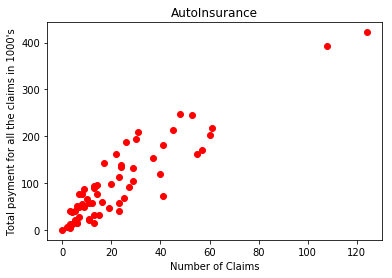

In [162]:
#Visualising data
plt.scatter(old_X,y,color = 'red')
plt.title('AutoInsurance')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment for all the claims in 1000\'s')

we have to fit a linear regression model to predict y


In [163]:
#Initializing Weights with zeros
init_theta = np.random.randn(2,1)
init_theta

array([[ 0.62780583],
       [-1.52847308]])

In [164]:
def cost_func(X,y,Theta):
    m = X.shape[0]
    J = (-1/(2*m))*sum((X.dot(Theta)-y)**2)
    return J

In [165]:
def grad_desc(X,y,theta,iterations = 1500,alpha = 0.001):
    costs = []
    for i in range(iterations):
        dtheta = (1/m)*np.dot(X.T,(np.dot(X,theta)-y))
        theta = theta - (alpha*dtheta)
        if(i%100 == 0):
            #print(dtheta)
            costs.append(cost_func(X,y,theta))
    return theta,costs        

In [166]:
print(init_theta)
theta,costs = grad_desc(x_train,y_train,init_theta,iterations = 2000,alpha = 0.001)
print(theta)

[[ 0.62780583]
 [-1.52847308]]
[[ 11.42554639]
 [  3.57544104]]


In [167]:
y_pred = np.dot(x_test,theta)
y_pred

array([[ 107.9624544 ],
       [  36.45363365],
       [  40.02907469],
       [  61.48172091],
       [  22.1518695 ],
       [ 200.92392138],
       [ 115.11333648],
       [  68.63260299],
       [  32.87819261],
       [  93.66069025],
       [  43.60451573],
       [  29.30275157],
       [  40.02907469],
       [  22.1518695 ],
       [  72.20804403],
       [ 154.44318789]])

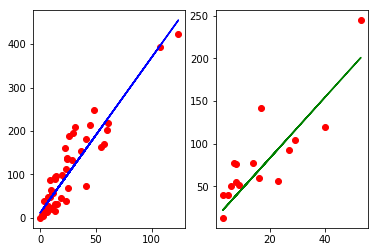

In [177]:
plt.subplot(1,2,1)
plt.scatter(x_train_plt,y_train_plt,color = 'red')
plt.plot(x_train_plt,x_train.dot(theta),color = 'blue')
plt.subplot(1,2,2)
plt.scatter(x_test_plt,y_test_plt,color = 'red')
plt.plot(x_test_plt,x_test.dot(theta),color = 'green')


In [169]:
def predict_error(y_test,y_pred):
    error = np.sqrt(np.sum((y_test-y_pred)**2)/y_test.shape[0])
    return error

In [170]:
error = predict_error(y_test,y_pred)
print(error)

29.8047560702
